[View in Colaboratory](https://colab.research.google.com/github/LuizFelipeLemon/machine_learning/blob/master/obtendo_dados_da_internet_varias_colunas.ipynb)

In [2]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "50_Startups.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

50_Startups.csv


In [3]:
import pandas as pd

def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

my_data_set = load_data()

my_data_set.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
my_data_set.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [23]:
# Misturando os dados 

from sklearn.utils import shuffle

oi = my_data_set

shuffle(my_data_set)

# Separando os dados para as variáveis independentes e para variável dependete 

X = my_data_set.iloc[:,:-1].values # pega todas as colunas e exclui a última
y = my_data_set.iloc[:, 4].values # pega só quinta coluna 


X = X[:,[0,1,2]] # escolhendo colunas específicas de X



# Dividindo entre arquivos de treinamento e teste 
# Split the data into training/testing sets
X_train = X[:-15]
X_test = X[-15:]




# Split the targets into training/testing sets
y_train = y[:-15]
y_test = y[-15:]
print(y_train)
print(y_test)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8 ]
[96479.51 90708.19 89949.14 81229.06 81005.76 78239.91 77798.83 71498.49
 69758.98 65200.33 64926.08 49490.75 42559.73 35673.41 14681.4 ]


In [0]:
print(X[0:6,:])

[[165349.2 136897.8 471784.1]
 [162597.7 151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34 91391.77 366168.42]
 [131876.9 99814.71 362861.36]]


In [13]:
# Preparando para a regressão 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.80561702 -0.05560965  0.02034445]
Mean squared error: 152503155.13
Variance score: 0.68


[91870.54827198 75467.4615552  92009.30518573 71748.26283459
 85358.23700543 75437.29161409 76455.52646175 72056.65054386
 61480.10318279 65183.68894547 49289.61469463 56013.07393474
 47818.14142225 52908.45147573 49762.77804871]
[96479.51 90708.19 89949.14 81229.06 81005.76 78239.91 77798.83 71498.49
 69758.98 65200.33 64926.08 49490.75 42559.73 35673.41 14681.4 ]


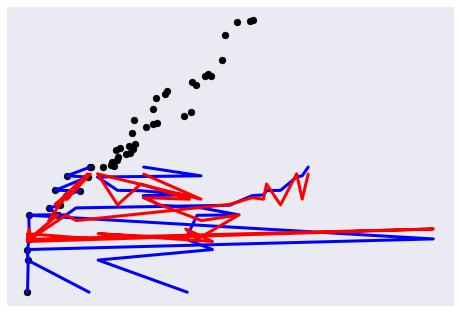

In [30]:

print(y_pred)
print(y_test)

# Plot outputs
plt.scatter(oi.iloc[:,0],oi.iloc[:, 4],  color='black')
plt.plot(X_test, y_test, color='blue', linewidth=3)
plt.plot(X_test, y_pred, color='red', linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()